## About Dataset 
    I used TIPS dataset for Data Analysis.
    Dataset contains columns:
    1. total_bill  --> total bill paid(in dollars)
    2. tip         --> tip received by waiter
    3. sex         --> gender(Female/Male)
    4. smoker      --> whether there were smokers in party
    5. day         --> day of the week
    6. time        --> dinner/lunch
    7. size        --> number of people in party
    8. Payer Name  --> name of the person who paid the bill
    9. CC Number   --> Credit Card Number
    10.Payment ID  --> Unique Id (contains day and some random unique number)
    Dataset has 244 rows,7 variable columns

#### I am not going to solve a specific problem in this dataset,what i do is analysing all columns individually,also exploring relations between 2 or more columns by visualizations 

### Python libraries used are
    1.Pandas
    2.Matplotlib
    3.Seaborn
    4.Numpy

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### To ignore Warnings

In [2]:
from IPython.core.interactiveshell import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading dataset
df=pd.read_csv("tips.csv",usecols=['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'Payer Name', 'CC Number', 'Payment ID'])

## Getting basic information about the dataset

In [4]:
df.head(8) # Getting top 8 rows

,total_bill,tip,sex,smoker,day,time,size,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,Tonya Carter,4832732618637221,Sun2251
5,25.29,4.71,Male,No,Sun,Dinner,4,Erik Smith,213140353657882,Sun9679
6,8.77,2.00,Male,No,Sun,Dinner,2,Kristopher Johnson,2223727524230344,Sun5985
7,26.88,3.12,Male,No,Sun,Dinner,4,Robert Buck,3514785077705092,Sun8157


In [5]:
df.tail(3) # Getting last 3 rows of dataset

,total_bill,tip,sex,smoker,day,time,size,Payer Name,CC Number,Payment ID
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Keith Wong,6011891618747196,Sat3880
242,17.82,1.75,Male,No,Sat,Dinner,2,Dennis Dixon,4375220550950,Sat17
243,18.78,3.00,Female,No,Thur,Dinner,2,Michelle Hardin,3511451626698139,Thur672


In [6]:
df.columns # Getting list of all columns in dataset

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'Payer Name', 'CC Number', 'Payment ID'],
      dtype='object')

In [7]:
df.shape # Getting shape of dataset

(244, 10)

In [8]:
df.info() # Getting basic info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   Payer Name  244 non-null    object 
 8   CC Number   244 non-null    int64  
 9   Payment ID  244 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 19.2+ KB


From above result,we can say\
1.There are no NULL values in dataset(because Non-Null Count is equal to total number of entries)\
2.There are 4 columns having numbers(float64,int)\
3.There are 6 columns of datatype OBJECT(string)

In [9]:
df.describe().T # Getting basic statistics about numerical columns in dataset

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,1.978594e+01,8.902412e+00,3.070000e+00,1.334750e+01,1.779500e+01,2.412750e+01,5.081000e+01
tip,244.0,2.998279e+00,1.383638e+00,1.000000e+00,2.000000e+00,2.900000e+00,3.562500e+00,1.000000e+01
size,244.0,2.569672e+00,9.510998e-01,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
CC Number,244.0,2.563496e+15,2.369340e+15,6.040679e+10,3.040731e+13,3.525318e+15,4.553675e+15,6.596454e+15


In [10]:
df.isnull().sum() # Checking number of NULL values in each column

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
Payer Name    0
CC Number     0
Payment ID    0
dtype: int64

### Correlation
    It is a statistical measure that expresses the extent to which 2 variables are LINEARLY related.
    1. Negative correlation means when one variable increases other decreases.
    2. Positive correlation means when one variable increases other also increases.
    3. No correlation means there is no relation between variables.

In [11]:
df.corr() # Checking correlation between each pair of columns

,total_bill,tip,size,CC Number
total_bill,1.000000,0.675734,0.598315,0.104576
tip,0.675734,1.000000,0.489299,0.110857
size,0.598315,0.489299,1.000000,-0.030239
CC Number,0.104576,0.110857,-0.030239,1.000000


<AxesSubplot:>

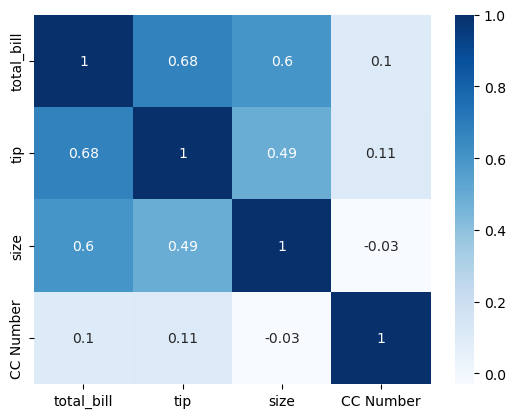

In [12]:
# Best way to visualize corrlation of a dataset is using HEATMAP of SEABORN                            
sns.heatmap(df.corr(),annot=True,cmap="Blues",annot_kws={'size':10})

In above output,\
1.Diagonal is 1,that is correlation of column with itself.\
2.High correlation can be seen in between columns tip and total_bill.\
3.As CC Number is some random unique number,we don't have to consider it.

Also,we can say that tip and total_bil are highly correlated to each other

####  Exploring smoker column in dataset

In [13]:
df['smoker'].unique() # Getting unique values in smoker column

array(['No', 'Yes'], dtype=object)

In [14]:
df['smoker'].value_counts() 

No     151
Yes     93
Name: smoker, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

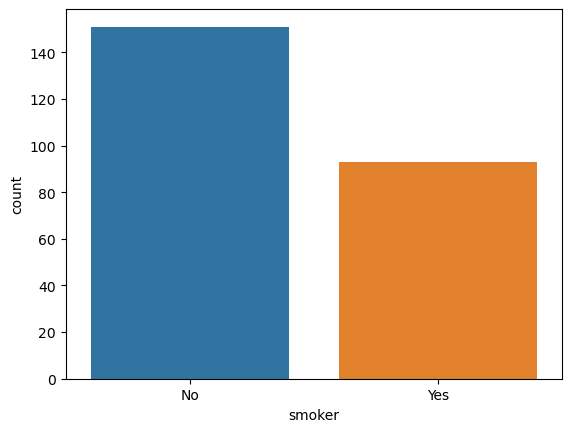

In [15]:
# We can also know value_counts by using
#                   COUNTPLOT of SEABORN                    
sns.countplot('smoker',data=df)

#### Exploring time column in dataset

In [16]:
df['time'].unique() # Getting unique values in time column

array(['Dinner', 'Lunch'], dtype=object)

In [17]:
df['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

#### Exploring size column

In [18]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

In [19]:
df['size'].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

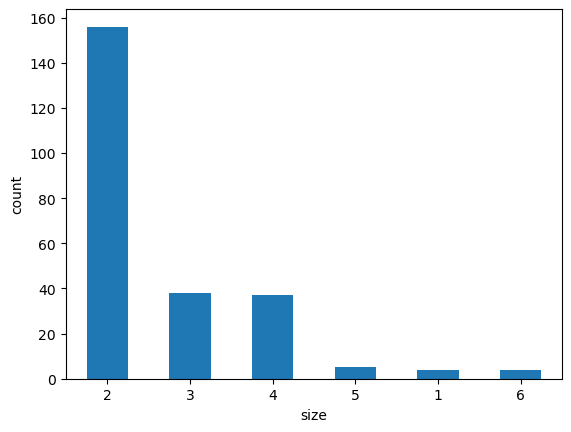

In [20]:
# plotting the above result as a barplot 
df['size'].value_counts().plot(kind='bar')
plt.xlabel('size')
plt.ylabel('count')
plt.xticks(rotation=0);

#### Exploring sex column in dataset

In [21]:
df['sex'].unique() # Getting unique values in sex column

array(['Female', 'Male'], dtype=object)

In [22]:
df['sex'].value_counts() 

Male      157
Female     87
Name: sex, dtype: int64

#### Exploring day column

In [23]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [24]:
df['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

#### Getting 1st five entries/rows where tip is high

In [25]:
df.nlargest(5,columns='tip')

,total_bill,tip,sex,smoker,day,time,size,Payer Name,CC Number,Payment ID
170,50.81,10.00,Male,Yes,Sat,Dinner,3,Gregory Clark,5473850968388236,Sat1954
212,48.33,9.00,Male,No,Sat,Dinner,4,Alex Williamson,676218815212,Sat4590
23,39.42,7.58,Male,No,Sat,Dinner,4,Lance Peterson,3542584061609808,Sat239
59,48.27,6.73,Male,No,Sat,Dinner,4,Brian Ortiz,6596453823950595,Sat8139
141,34.30,6.70,Male,No,Thur,Lunch,6,Steven Carlson,3526515703718508,Thur1025


#### Getting top 10 rows in which total_bill paid is high



In [26]:
df.sort_values(by='total_bill',axis=0,ascending=False,ignore_index=True)[:10]

,total_bill,tip,sex,smoker,day,time,size,Payer Name,CC Number,Payment ID
0,50.81,10.00,Male,Yes,Sat,Dinner,3,Gregory Clark,5473850968388236,Sat1954
1,48.33,9.00,Male,No,Sat,Dinner,4,Alex Williamson,676218815212,Sat4590
2,48.27,6.73,Male,No,Sat,Dinner,4,Brian Ortiz,6596453823950595,Sat8139
3,48.17,5.00,Male,No,Sun,Dinner,6,Ryan Gonzales,3523151482063321,Sun7518
4,45.35,3.50,Male,Yes,Sun,Dinner,3,Jose Parsons,4112207559459910,Sun2337
5,44.30,2.50,Female,Yes,Sat,Dinner,3,Heather Cohen,379771118886604,Sat6240
6,43.11,5.00,Female,Yes,Thur,Lunch,4,Brooke Soto,5544902205760175,Thur9313
7,41.19,5.00,Male,No,Thur,Lunch,5,Eric Andrews,4356531761046453,Thur3621
8,40.55,3.00,Male,Yes,Sun,Dinner,2,Stephen Cox,3547798222044029,Sun5140
9,40.17,4.73,Male,Yes,Fri,Dinner,4,Aaron Bentley,180026611638690,Fri9628


From above output,we can say that,\
      High Bills are paid in Saturday

#### We want to know how many male smokers and female smokers are there in dataset

In [27]:
df[['sex','smoker']].groupby(['sex',"smoker"]).size()

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64

From above output,we can say that\
1.Total number of Female smokers are 33.\
2.Total number of Male smokers are 60.

#### We want to know average total_bill on each day

In [28]:
df[['day','total_bill']].groupby('day').mean()

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


We can say that,\
  Average total_bill on Friday is 17.15,\
  Average total_bill on Saturday is 20.44,\
  Average total_bill on Sunday is 21.41,\
  Average total_bill on Thursday is 17.68.

#### In datset,we have total_bill and size columns,by using them we can find price_per_person

In [29]:
df['price_per_person']=np.round(df['total_bill']/df['size'],2)

In [30]:
df.head(3)

,total_bill,tip,sex,smoker,day,time,size,Payer Name,CC Number,Payment ID,price_per_person
0,16.99,1.01,Female,No,Sun,Dinner,2,Christy Cunningham,3560325168603410,Sun2959,8.49
1,10.34,1.66,Male,No,Sun,Dinner,3,Douglas Tucker,4478071379779230,Sun4608,3.45
2,21.01,3.50,Male,No,Sun,Dinner,3,Travis Walters,6011812112971322,Sun4458,7.00


#### In dataset,we have Payment ID,which is unique,what we can do is,we can make it as  index 

In [31]:
# initial index is
df.index

RangeIndex(start=0, stop=244, step=1)

In [32]:
df.set_index('Payment ID',inplace=False)
# we can save that by making inplace=True(but i am not doing that)

,total_bill,tip,sex,smoker,day,time,size,Payer Name,CC Number,price_per_person
Payment ID,,,,,,,,,,
Sun2959,16.99,1.01,Female,No,Sun,Dinner,2,Christy Cunningham,3560325168603410,8.49
Sun4608,10.34,1.66,Male,No,Sun,Dinner,3,Douglas Tucker,4478071379779230,3.45
Sun4458,21.01,3.50,Male,No,Sun,Dinner,3,Travis Walters,6011812112971322,7.00
Sun5260,23.68,3.31,Male,No,Sun,Dinner,2,Nathaniel Harris,4676137647685994,11.84
Sun2251,24.59,3.61,Female,No,Sun,Dinner,4,Tonya Carter,4832732618637221,6.15
...,...,...,...,...,...,...,...,...,...,...
Sat2657,29.03,5.92,Male,No,Sat,Dinner,3,Michael Avila,5296068606052842,9.68
Sat1766,27.18,2.00,Female,Yes,Sat,Dinner,2,Monica Sanders,3506806155565404,13.59
Sat3880,22.67,2.00,Male,Yes,Sat,Dinner,2,Keith Wong,6011891618747196,11.34


#### We can change values of smoker column from 
     No --> 0
     Yes -->1

In [33]:
df['smoker'].replace(to_replace=['No','Yes'],value=[0,1])

0      0
1      0
2      0
3      0
4      0
      ..
239    0
240    1
241    1
242    0
243    0
Name: smoker, Length: 244, dtype: int64

#### If you observed Payment ID,it has values having a string and a number
          

In [34]:
df['Payment ID'].sample(4) # Randomly Getting 4 values of Payment ID column

62      Sat2265
207     Sat4505
115     Sun8746
202    Thur1301
Name: Payment ID, dtype: object

dtype('0') --> means data type is object

In [35]:
df['Payment ID'].dtype

dtype('O')

#### We want to seperate that Payment ID values to string and number 
     By that,we can be also to use that number as index

In [36]:
df['Payment ID'].str.split("([a-zA-Z]+)([0-9]+)",expand=True).sample(5)

,0,1,2,3
199,,Thur,2428,
122,,Thur,3579,
37,,Sat,6406,
85,,Thur,7972,
5,,Sun,9679,


In [37]:
df['Payment_ID_num']=df['Payment ID'].str.split("([a-zA-Z]+)([0-9]+)",expand=True)[2]

In [38]:
df['Payment_ID_str']=df['Payment ID'].str.split("([a-zA-Z]+)([0-9]+)",expand=True)[1]

In [39]:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size,Payer Name,CC Number,Payment ID,price_per_person,Payment_ID_num,Payment_ID_str
186,20.90,3.50,Female,Yes,Sun,Dinner,3,Heidi Atkinson,4422858423131187,Sun4254,6.97,4254,Sun
14,14.83,3.02,Female,No,Sun,Dinner,2,Vanessa Jones,30016702287574,Sun3848,7.42,3848,Sun
24,19.82,3.18,Male,No,Sat,Dinner,2,Christopher Ross,36739148167928,Sat6236,9.91,6236,Sat
83,32.68,5.00,Male,Yes,Thur,Lunch,2,Daniel Murphy,5356177501009133,Thur8801,16.34,8801,Thur
202,13.00,2.00,Female,Yes,Thur,Lunch,2,Ashley Shaw,180088043008041,Thur1301,6.50,1301,Thur


### plot of total_bill vs tip

Text(0, 0.5, 'Total_Bill')

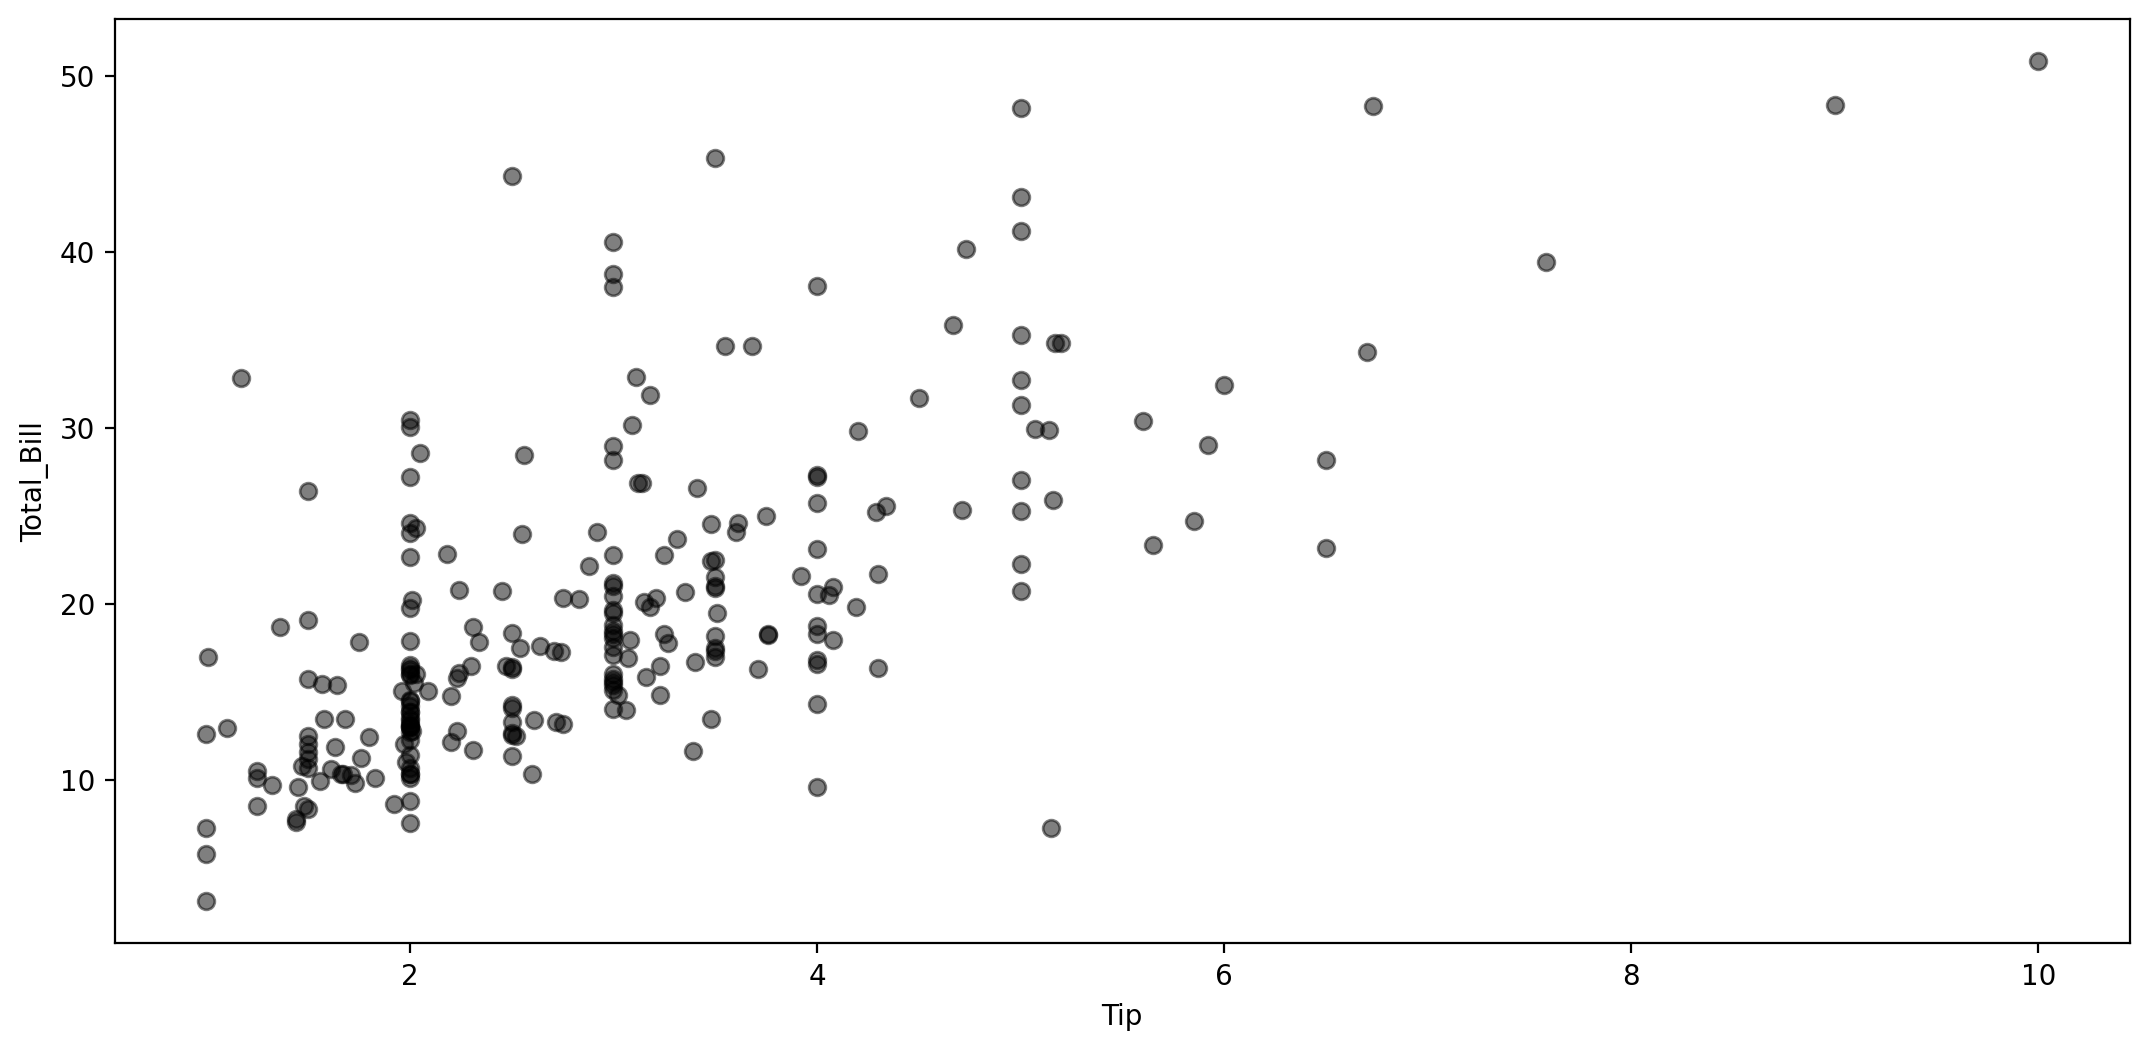

In [40]:
# using matplotlib

plt.figure(figsize=(13,6),dpi=200)
plt.scatter(x=df['tip'],y=df['total_bill'],color='black',alpha=0.5)
plt.xlabel("Tip")
plt.ylabel("Total_Bill")

In [41]:
#setting style in SEABORN
sns.set(font_scale=1,style="white")

### plot of total_bill vs tip using seaborn's jointplot

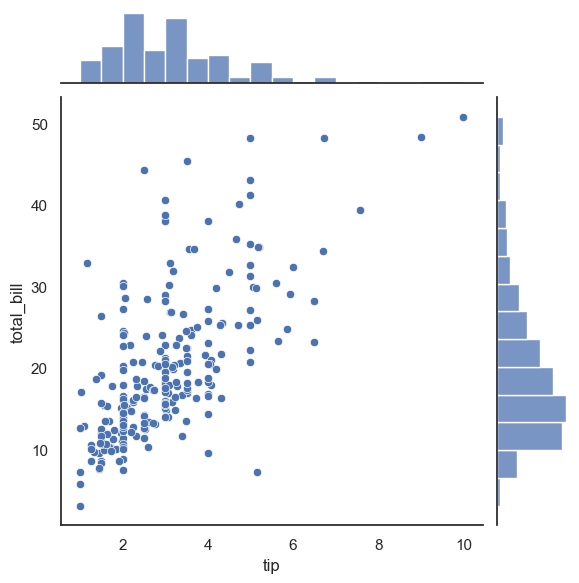

In [42]:
sns.jointplot(x='tip',y='total_bill',data=df)

### plot of total_bill,tip and coloring based on time column

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

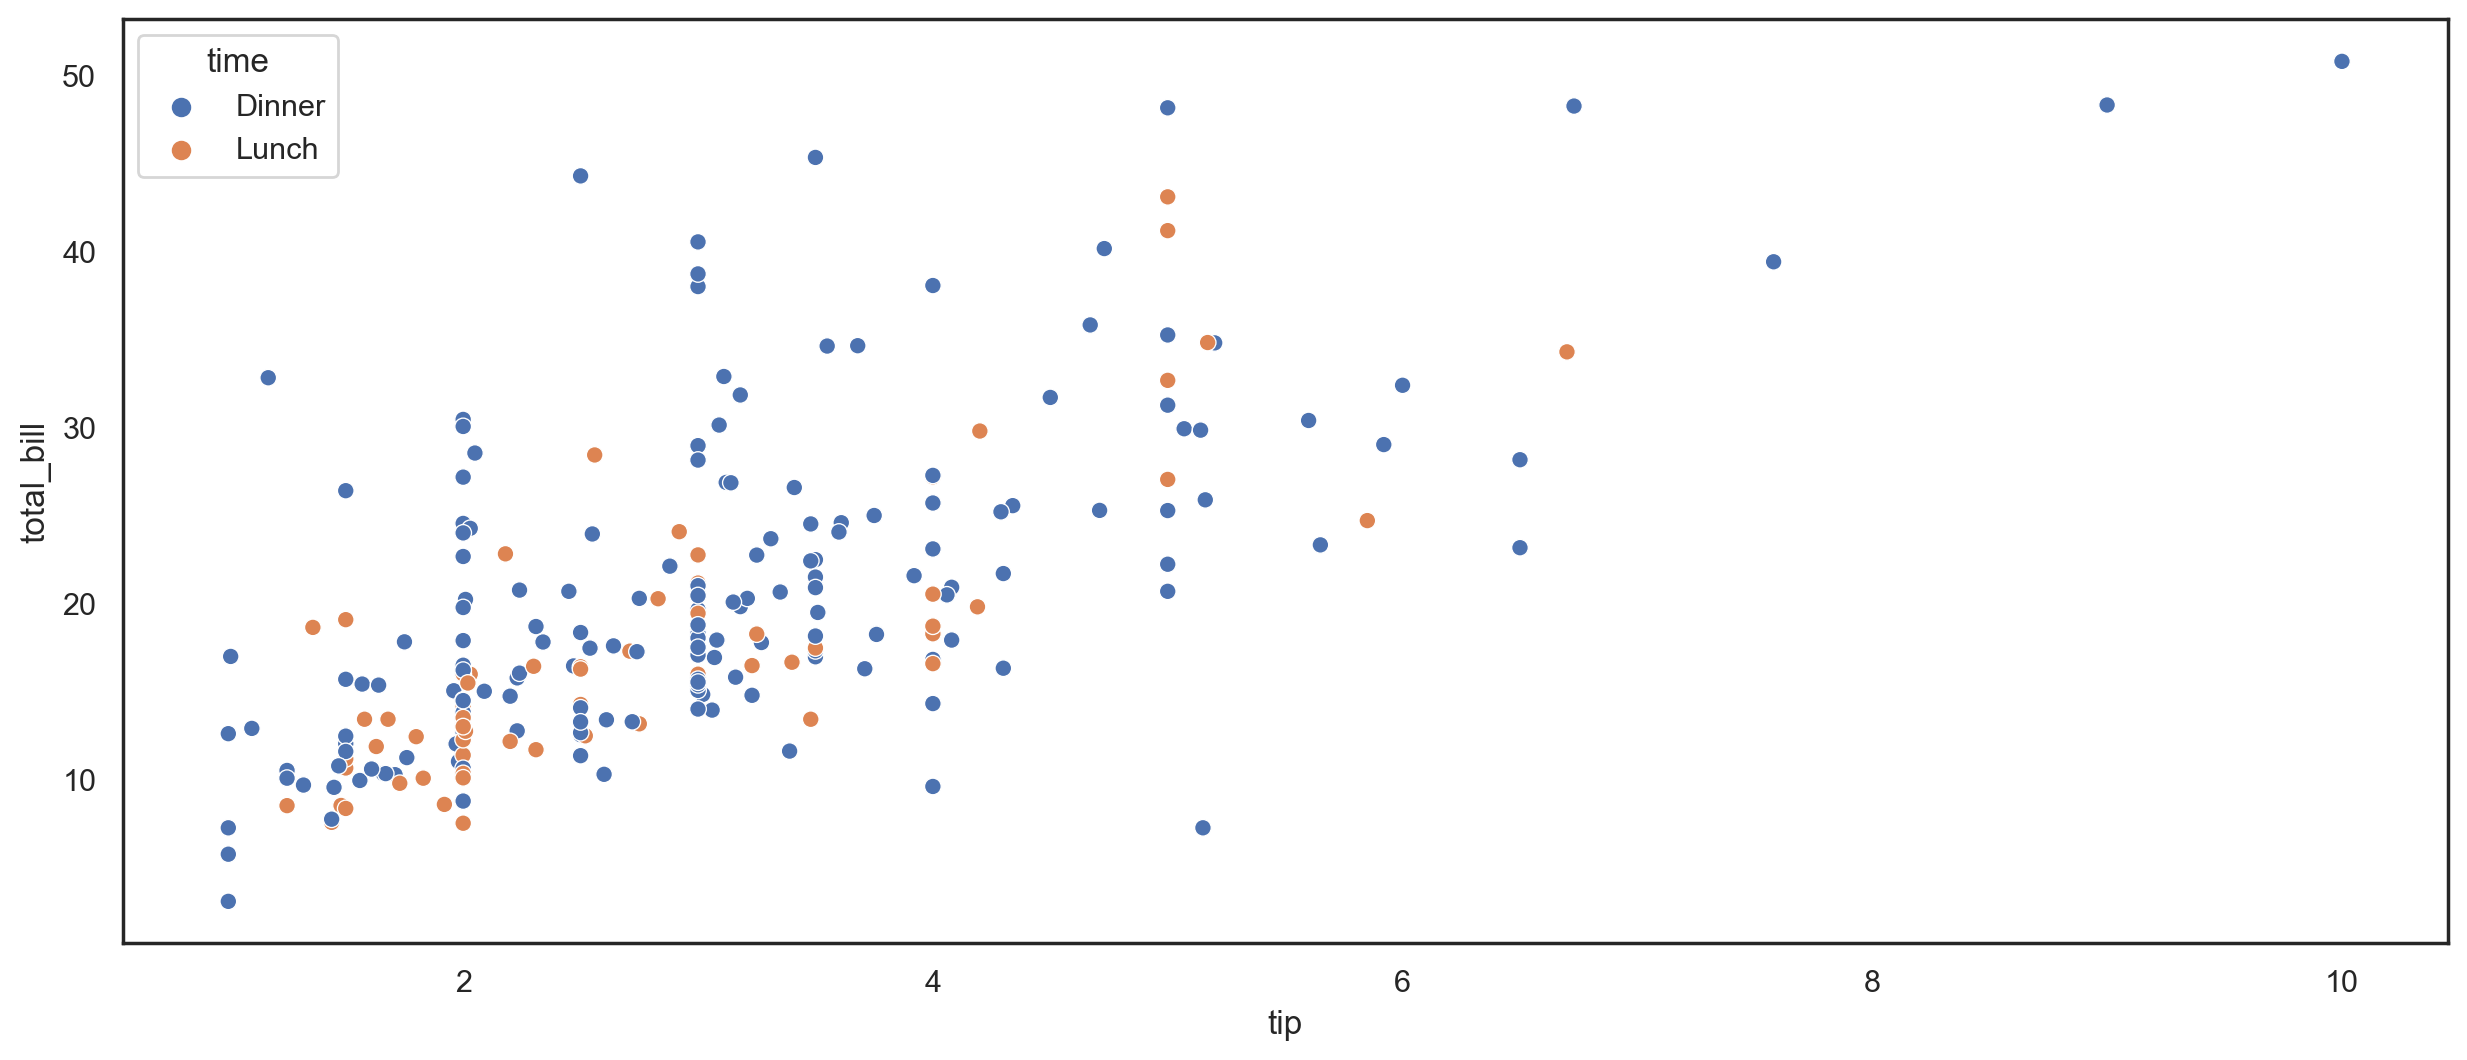

In [43]:
plt.figure(figsize=(15,6),dpi=200)
sns.scatterplot(x='tip',y='total_bill',data=df,hue='time')

### plot of total_bill,tip and coloring based on sex column

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

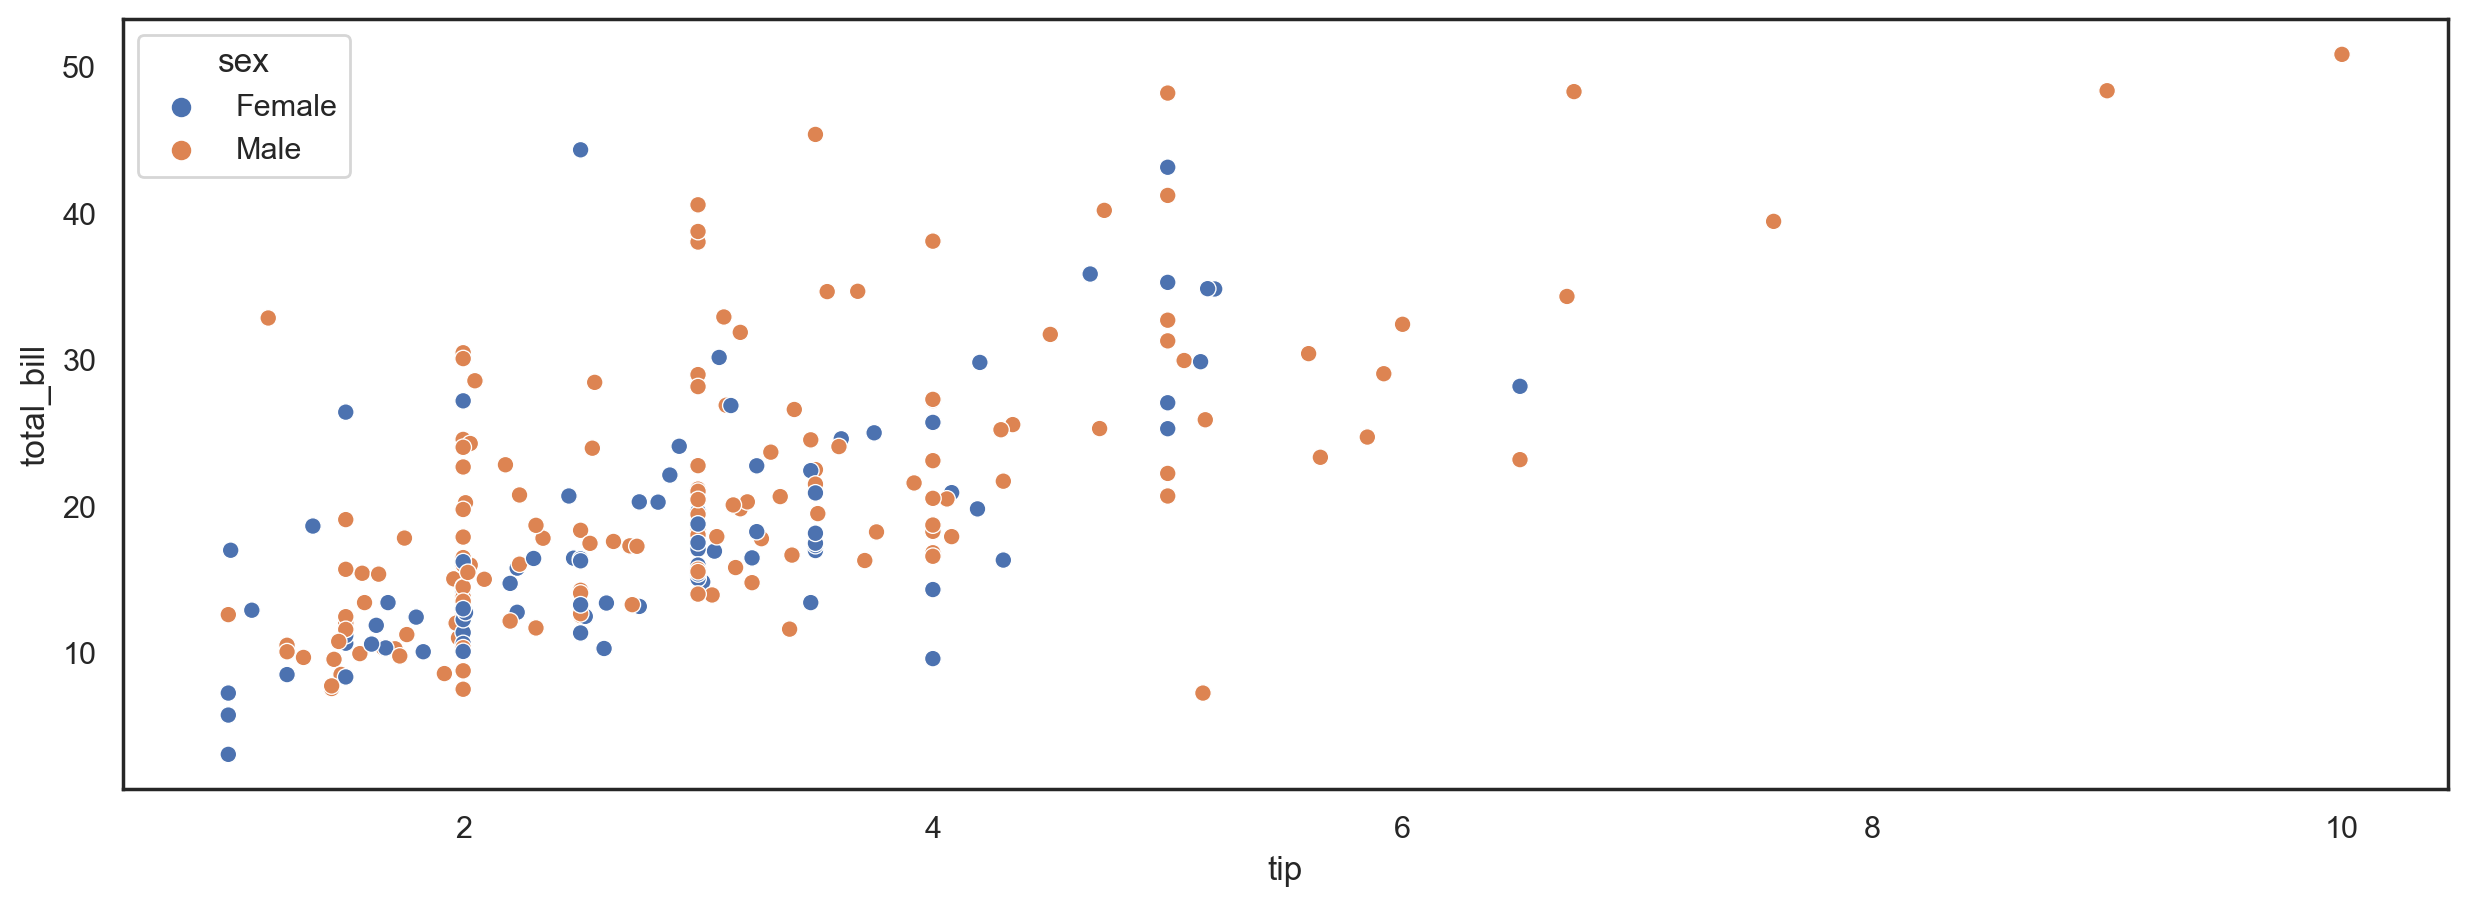

In [44]:
plt.figure(figsize=(15,5),dpi=200)
sns.scatterplot(x='tip',y='total_bill',data=df,hue='sex')

### plot of total_bill,tip and coloring based on sex column

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

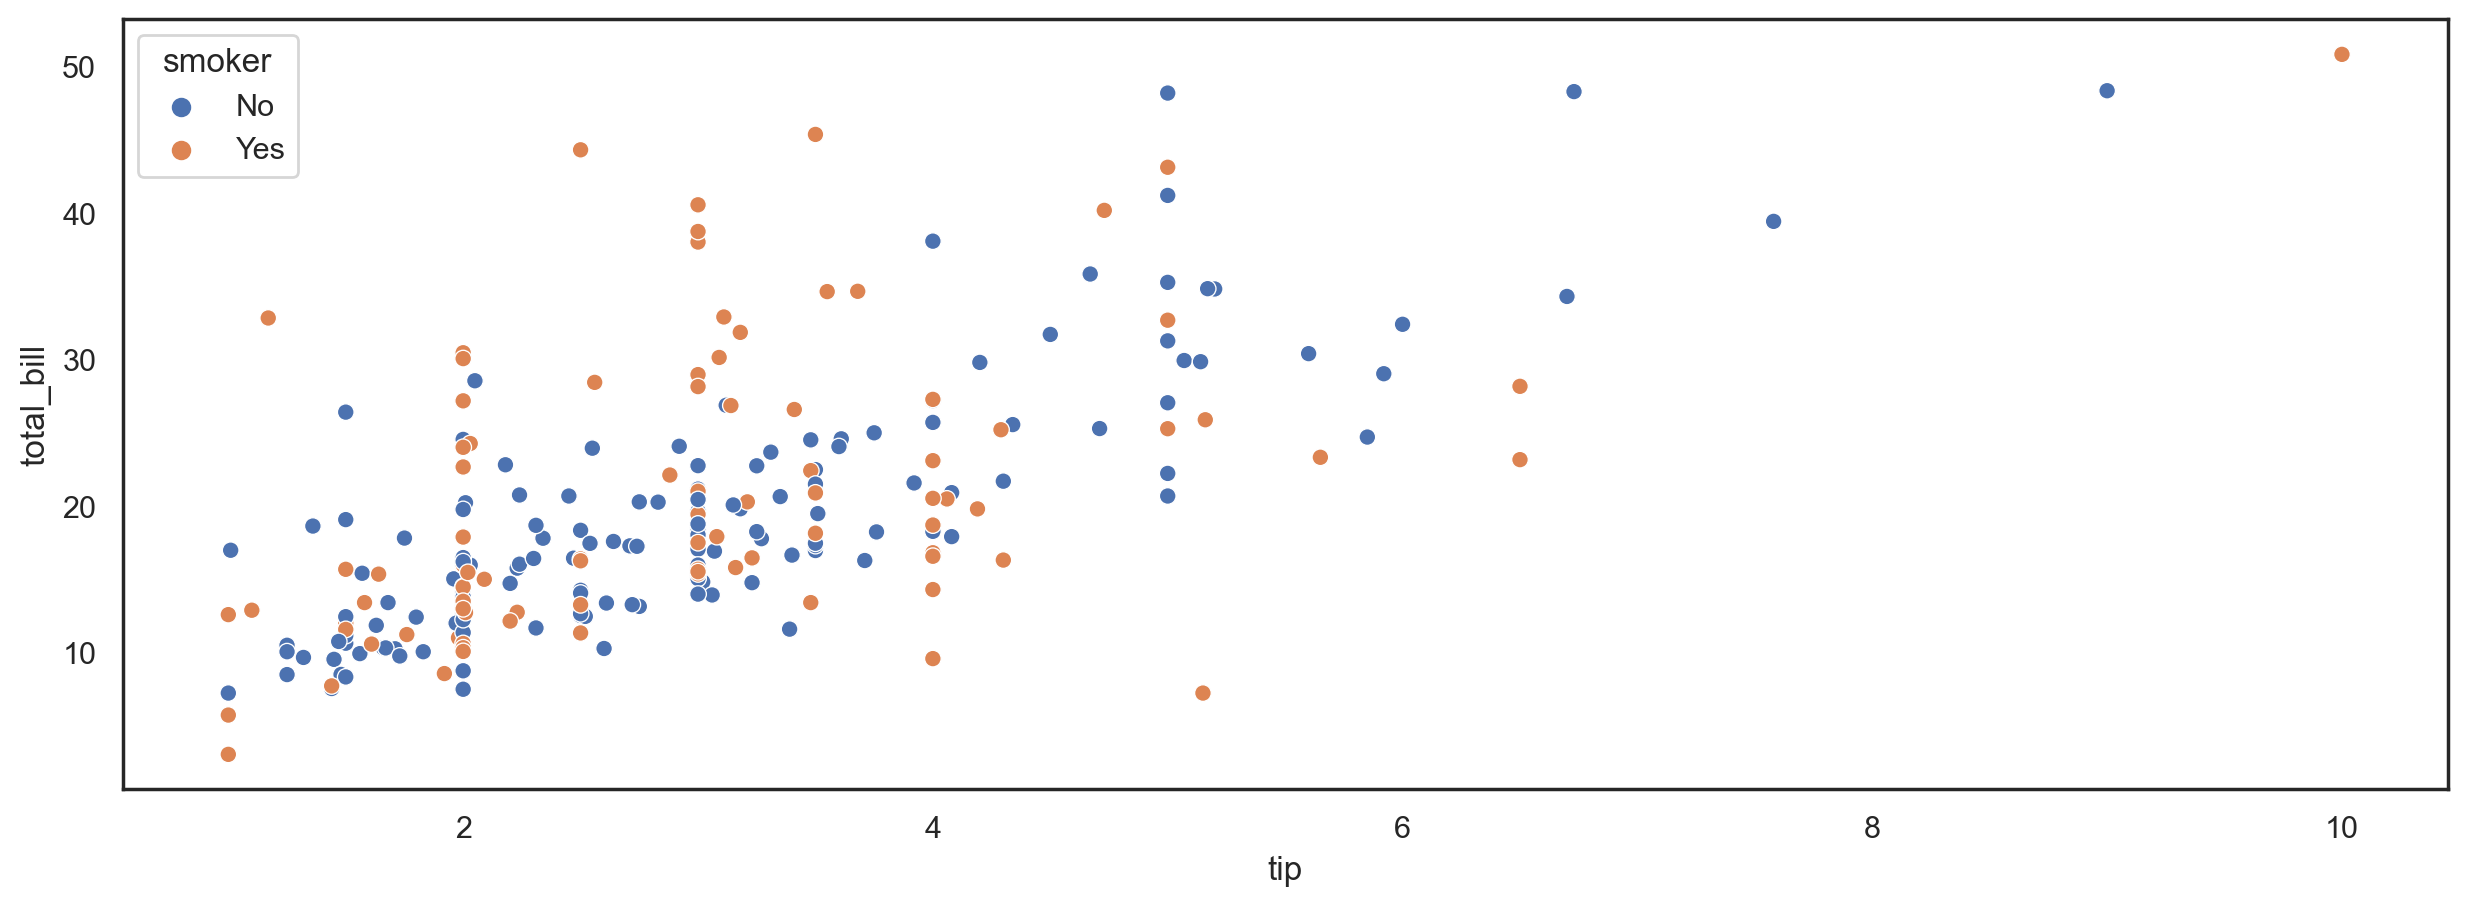

In [45]:
plt.figure(figsize=(15,5),dpi=200)
sns.scatterplot(x='tip',y='total_bill',data=df,hue='smoker')

### Distribution plot of total_bill

(0.0, 60.0)

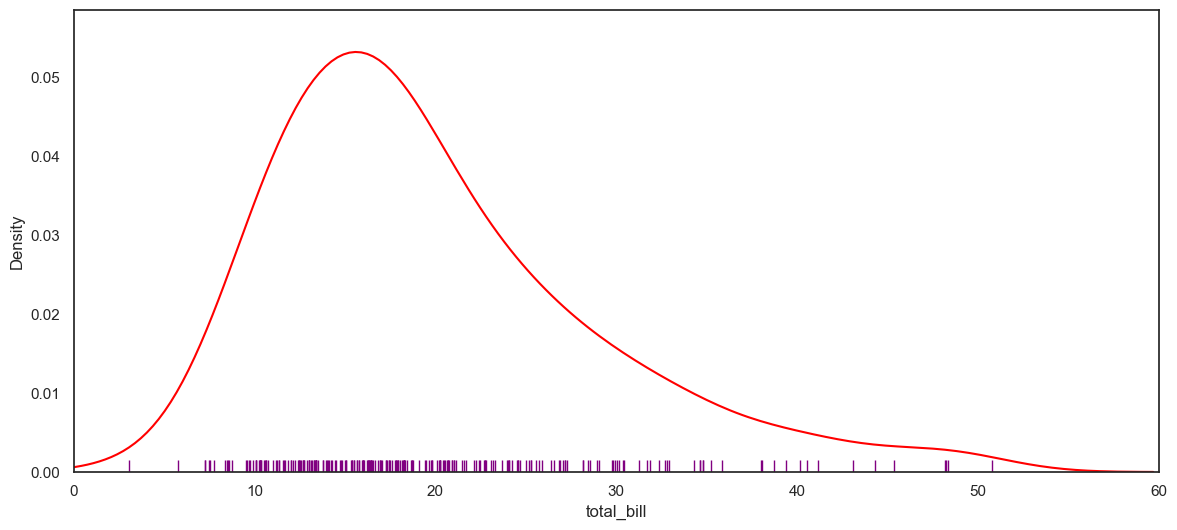

In [46]:
plt.figure(figsize=(14,6))
d=sns.distplot(df['total_bill'],hist=False,rug=True,color='purple')
d.lines[0].set_color('red')
plt.xlim(0,60)

### Distribution of total_bill for different days

(0.0, 60.0)

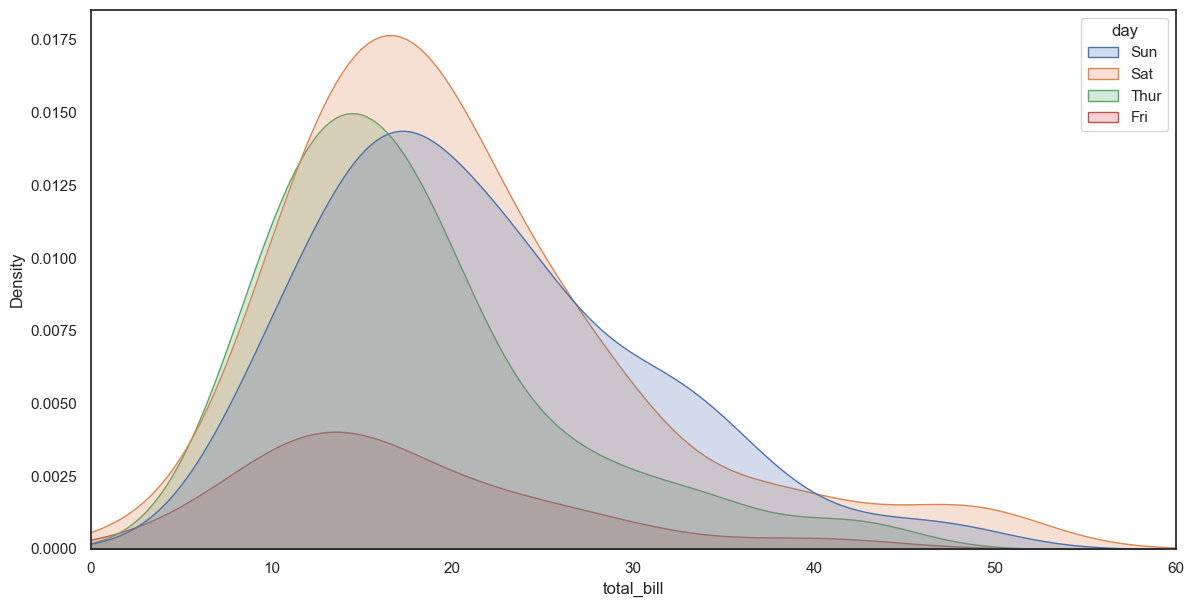

In [47]:
plt.figure(figsize=(14,7))
sns.kdeplot(df['total_bill'],hue=df['day'],fill=True)
plt.xlim(0,60)

#### Using Categorical plot

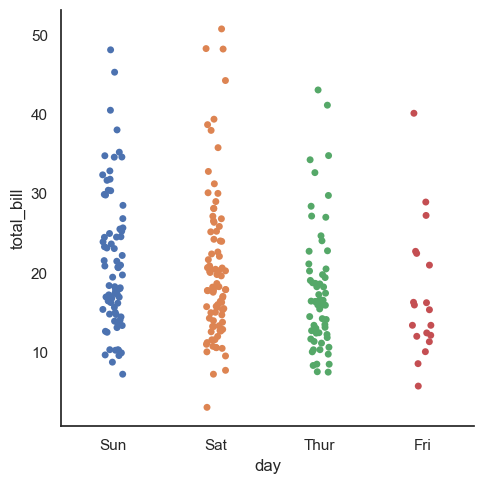

In [48]:
sns.catplot(x='day',y='total_bill',data=df)

From above plot,we can say that,\
1.More than 40 dollars bill is paid at only saturday and sunday,,that means customers are willing to pay much at those days.\
2.At friday,bill paid is less,,also there is no much distribution for friday,,that may means customers are not coming to restaurant

### plotting categorical columns(sex,time,smoker) with continuous column(total_bill)

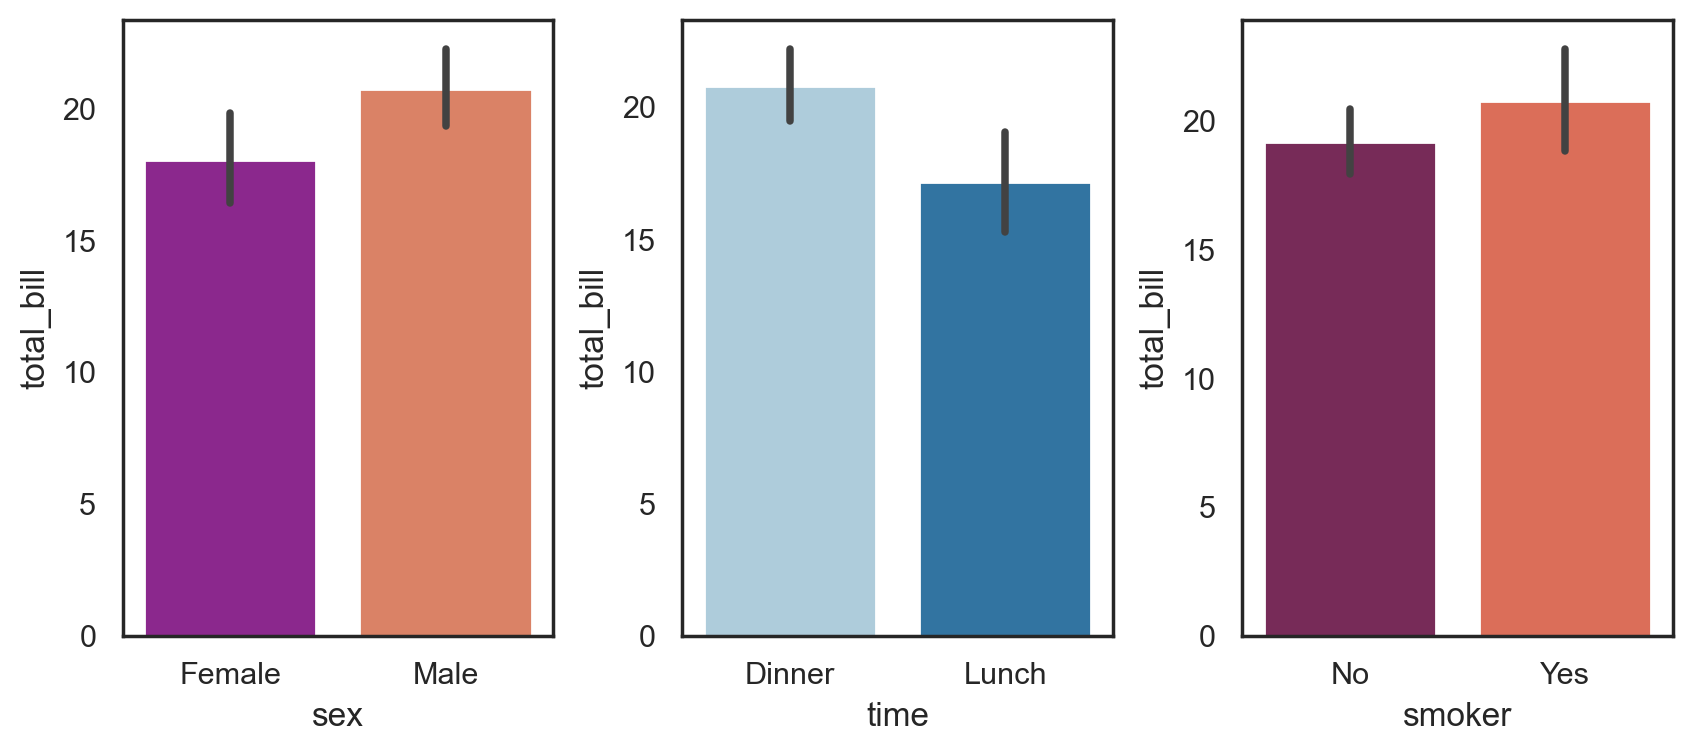

In [49]:
fig,ax=plt.subplots(ncols=3,figsize=(10,4),dpi=200)
sns.barplot(x='sex',y='total_bill',data=df,palette="plasma",ax=ax[0])
sns.barplot(x='time',y='total_bill',data=df,palette="Paired",ax=ax[1])
sns.barplot(x='smoker',y='total_bill',data=df,palette="rocket",ax=ax[2])
fig.subplots_adjust(wspace=0.3)

From above plot,we can say that,\
High bill is paid by Male persons,Smokers and at Dinner time